In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk(r"C:\Users\arghy\Downloads\Compressed\archive\NEU Metal Surface Defects Data"):
    for filename in filenames:
        print(os.path.join(dirname, filename))


C:\Users\arghy\Downloads\Compressed\archive\NEU Metal Surface Defects Data\Thumbs.db
C:\Users\arghy\Downloads\Compressed\archive\NEU Metal Surface Defects Data\test\Crazing\Cr_1.bmp
C:\Users\arghy\Downloads\Compressed\archive\NEU Metal Surface Defects Data\test\Crazing\Cr_10.bmp
C:\Users\arghy\Downloads\Compressed\archive\NEU Metal Surface Defects Data\test\Crazing\Cr_100.bmp
C:\Users\arghy\Downloads\Compressed\archive\NEU Metal Surface Defects Data\test\Crazing\Cr_101.bmp
C:\Users\arghy\Downloads\Compressed\archive\NEU Metal Surface Defects Data\test\Crazing\Cr_102.bmp
C:\Users\arghy\Downloads\Compressed\archive\NEU Metal Surface Defects Data\test\Crazing\Cr_103.bmp
C:\Users\arghy\Downloads\Compressed\archive\NEU Metal Surface Defects Data\test\Crazing\Cr_104.bmp
C:\Users\arghy\Downloads\Compressed\archive\NEU Metal Surface Defects Data\test\Crazing\Cr_105.bmp
C:\Users\arghy\Downloads\Compressed\archive\NEU Metal Surface Defects Data\test\Crazing\Cr_106.bmp
C:\Users\arghy\Downloads\Co

In [2]:
train_dir = r"C:\Users\arghy\Downloads\Compressed\archive\NEU Metal Surface Defects Data\train"
test_dir = r"C:\Users\arghy\Downloads\Compressed\archive\NEU Metal Surface Defects Data\test"
valid_dir = r"C:\Users\arghy\Downloads\Compressed\archive\NEU Metal Surface Defects Data\valid"


In [3]:
train_datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=20,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)


#get the images from train datagen
train_generator = train_datagen.flow_from_directory(train_dir,
                                              target_size=(200, 200),
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=True)
valid_generator = test_datagen.flow_from_directory(valid_dir,
                                              target_size=(200, 200),
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=False)

test_generator = test_datagen.flow_from_directory(test_dir,
                                              target_size=(200, 200),
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=False)




#checking for batch size
for image_batch , labels_batch in train_generator :
    print(image_batch.shape)
    print(labels_batch.shape)
    break





#checking for class names
class_names = train_generator.class_indices
class_names = list(class_names.keys())
print(class_names)

Found 1656 images belonging to 6 classes.
Found 72 images belonging to 6 classes.
Found 72 images belonging to 6 classes.
(32, 200, 200, 3)
(32, 6)
['Crazing', 'Inclusion', 'Patches', 'Pitted', 'Rolled', 'Scratches']


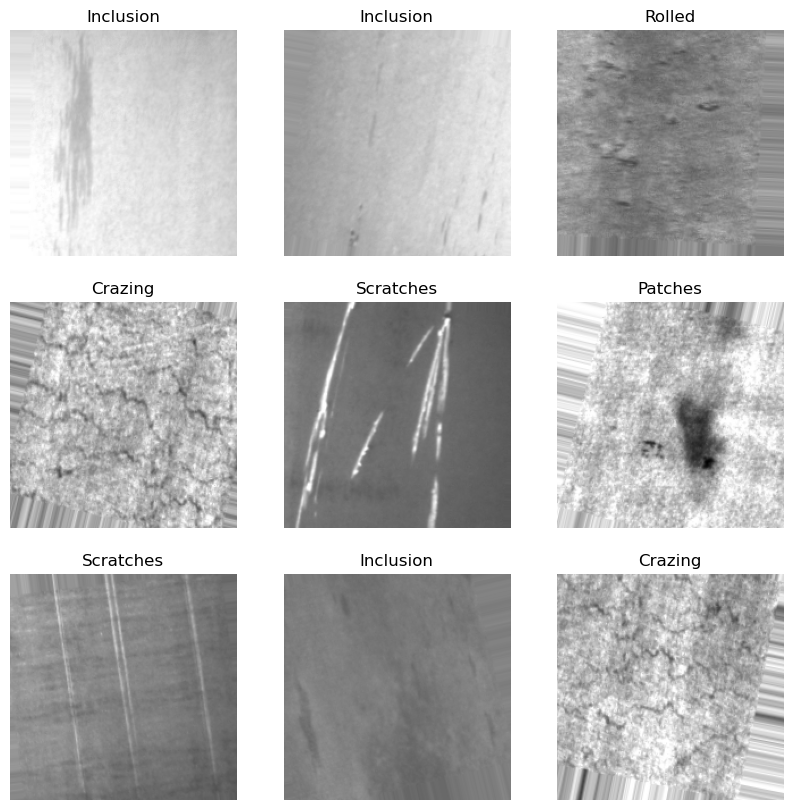

In [4]:
#making functions
def get_sample_image(generator):
    images, labels = next(generator)
    image = images[0]
    label_index = np.argmax(labels[0])
    label_name = class_names[label_index]

    return image, label_name


def sample_images(generator, nrows=3, ncols=3):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 10))
    
    for i in range(nrows*ncols):
        image, label_name = get_sample_image(generator)
        row = i // ncols
        col = i % ncols
        ax = axes[row][col]
        ax.imshow(image)
        ax.set_title(label_name)
        ax.axis('off')

    plt.show()

sample_images(train_generator, nrows=3, ncols=3)


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout
from tensorflow.keras.applications.efficientnet import EfficientNetB7

In [6]:
model1 = Sequential([ Conv2D(32, (2, 2), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (2, 2), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (2, 2), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(6 ,activation='softmax')])

In [7]:
model1.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [8]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 199, 199, 32)      416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 98, 98, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 49, 49, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 128)       32896     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 24, 24, 128)      0

In [9]:
history = model1.fit(train_generator,
                    epochs=15,
                    batch_size=32,
                    validation_data=valid_generator)

Epoch 1/15
52/52 [==============================] - 35s 645ms/step - loss: 1.7533 - accuracy: 0.2977 - val_loss: 1.3294 - val_accuracy: 0.5139
Epoch 2/15
52/52 [==============================] - 34s 659ms/step - loss: 0.9952 - accuracy: 0.6329 - val_loss: 0.9375 - val_accuracy: 0.7222
Epoch 3/15
52/52 [==============================] - 37s 701ms/step - loss: 0.6896 - accuracy: 0.7452 - val_loss: 0.7445 - val_accuracy: 0.6944
Epoch 4/15
52/52 [==============================] - 37s 711ms/step - loss: 0.5373 - accuracy: 0.8116 - val_loss: 0.5112 - val_accuracy: 0.8750
Epoch 5/15
52/52 [==============================] - 37s 703ms/step - loss: 0.4096 - accuracy: 0.8533 - val_loss: 0.3925 - val_accuracy: 0.8750
Epoch 6/15
52/52 [==============================] - 35s 666ms/step - loss: 0.3600 - accuracy: 0.8762 - val_loss: 0.3974 - val_accuracy: 0.8611
Epoch 7/15
52/52 [==============================] - 36s 694ms/step - loss: 0.3529 - accuracy: 0.8708 - val_loss: 0.3875 - val_accuracy: 0.8750

In [10]:
def plot_history(history,metric):
    plt.plot(history.history[metric])
    plt.plot(history.history["val_"+metric],"")
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, "val_"+metric])
    plt.show()

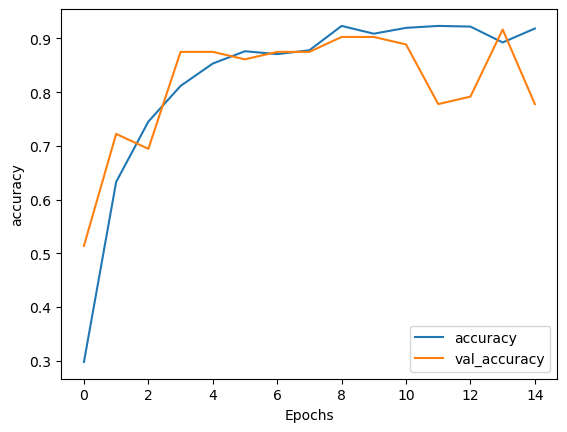

In [11]:
plot_history(history,"accuracy")

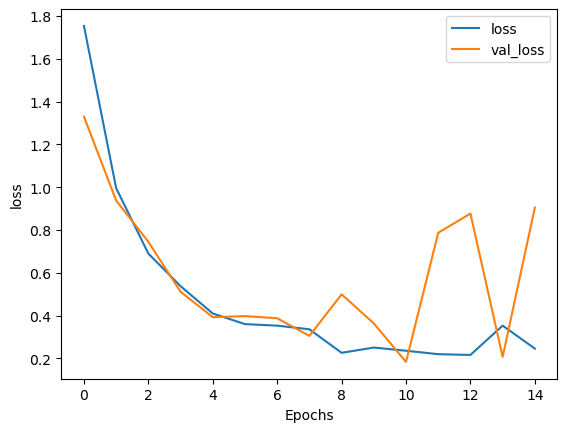

In [12]:
plot_history(history,"loss")

In [13]:
result = model1.evaluate(test_generator)
print("Test loss, Test accuracy : ", result)

3/3 [==============================] - 0s 78ms/step - loss: 0.5074 - accuracy: 0.8056
Test loss, Test accuracy :  [0.5074306130409241, 0.8055555820465088]


In [15]:
print("Test accuracy:", result[1])

Test accuracy: 0.8055555820465088


In [16]:
from tensorflow.keras.applications import VGG16, ResNet50

# Define functions to load base models
def load_model_2(input_shape):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    model = Sequential()
    model.add(base_model)
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(6, activation='softmax'))
    return model

def load_model_3(input_shape):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    model = Sequential()
    model.add(base_model)
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(6, activation='softmax'))
    return model



In [17]:
# Load model1
model1 = Sequential([
    Conv2D(32, (2, 2), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (2, 2), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (2, 2), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(6, activation='softmax')
])

# Compile model1
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Load additional models
model2 = load_model_2((200, 200, 3))  # Adjust input shape as per your dataset
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model3 = load_model_3((200, 200, 3))  # Adjust input shape as per your dataset
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Generate predictions from each model
preds_model1 = model1.predict(test_generator)
preds_model2 = model2.predict(test_generator)
preds_model3 = model3.predict(test_generator)

# Ensemble method: averaging predictions
ensemble_preds = (preds_model1 + preds_model2 + preds_model3) / 3

# Evaluate ensemble performance
ensemble_result = model1.evaluate(test_generator)  # Evaluate on any one model
print("Ensemble Test loss, Test accuracy:", ensemble_result)

3/3 [==============================] - 1s 84ms/step - loss: 1.7992 - accuracy: 0.1528
Ensemble Test loss, Test accuracy: [1.7992401123046875, 0.1527777761220932]


In [18]:
# Adjust model architectures, optimizer, learning rate, and epochs as needed
# Model 1
model1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')
])
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model 2 (VGG16)
model2 = load_model_2((200, 200, 3))  # Use load_model_2 function as defined previously
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model 3 (ResNet50)
model3 = load_model_3((200, 200, 3))  # Use load_model_3 function as defined previously
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the models
history_model1 = model1.fit(train_generator, epochs=20, validation_data=valid_generator)
history_model2 = model2.fit(train_generator, epochs=20, validation_data=valid_generator)
history_model3 = model3.fit(train_generator, epochs=20, validation_data=valid_generator)


Epoch 1/20
52/52 [==============================] - 42s 790ms/step - loss: 1.7483 - accuracy: 0.2536 - val_loss: 1.0699 - val_accuracy: 0.6944
Epoch 2/20
52/52 [==============================] - 42s 798ms/step - loss: 1.0947 - accuracy: 0.5682 - val_loss: 0.7377 - val_accuracy: 0.6944
Epoch 3/20
52/52 [==============================] - 43s 826ms/step - loss: 0.7625 - accuracy: 0.7252 - val_loss: 0.4820 - val_accuracy: 0.9028
Epoch 4/20
52/52 [==============================] - 44s 845ms/step - loss: 0.5898 - accuracy: 0.7953 - val_loss: 0.2476 - val_accuracy: 0.9167
Epoch 5/20
52/52 [==============================] - 44s 844ms/step - loss: 0.4174 - accuracy: 0.8587 - val_loss: 0.5841 - val_accuracy: 0.8889
Epoch 6/20
52/52 [==============================] - 46s 886ms/step - loss: 0.4384 - accuracy: 0.8400 - val_loss: 0.3229 - val_accuracy: 0.8750
Epoch 7/20
52/52 [==============================] - 46s 878ms/step - loss: 0.3490 - accuracy: 0.8877 - val_loss: 0.1827 - val_accuracy: 0.9444

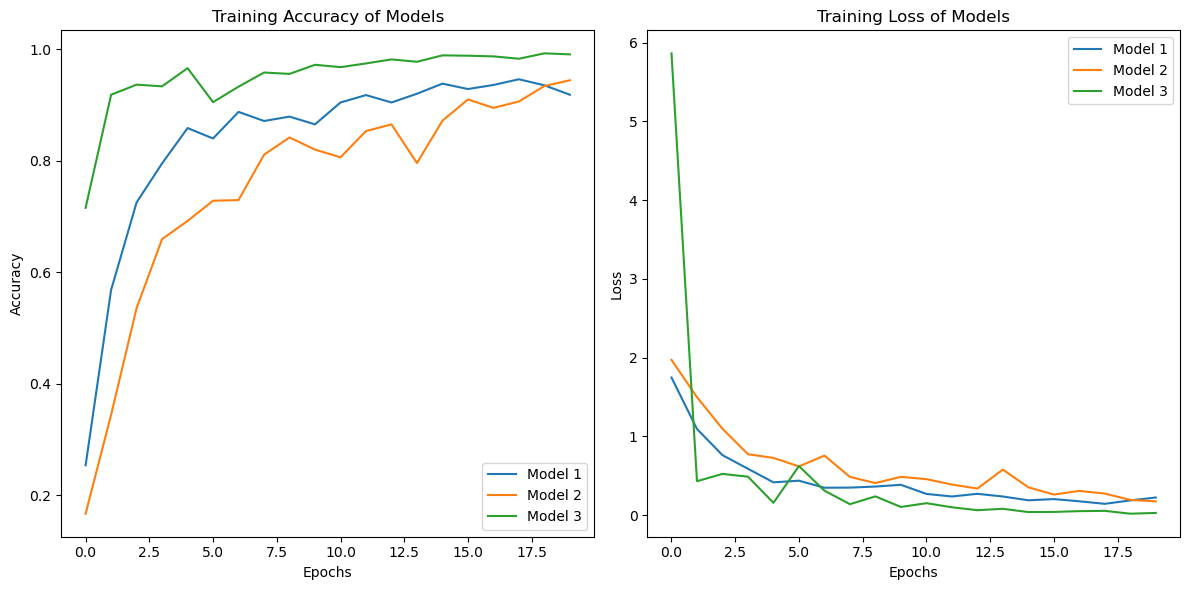

In [23]:
import matplotlib.pyplot as plt

# Assuming you have access to the training history of each model
# history_model1, history_model2, history_model3 represent the training history of each respective model

# Plotting accuracy for all models
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history_model1.history['accuracy'], label='Model 1')
plt.plot(history_model2.history['accuracy'], label='Model 2')
plt.plot(history_model3.history['accuracy'], label='Model 3')
plt.title('Training Accuracy of Models')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting loss for all models
plt.subplot(1, 2, 2)
plt.plot(history_model1.history['loss'], label='Model 1')
plt.plot(history_model2.history['loss'], label='Model 2')
plt.plot(history_model3.history['loss'], label='Model 3')
plt.title('Training Loss of Models')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

3/3 [==============================] - 3s 763ms/step - loss: 0.3585 - accuracy: 0.8889


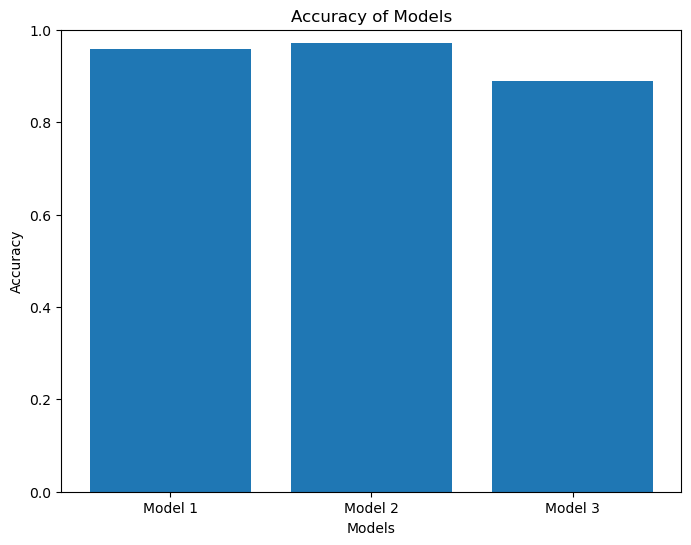

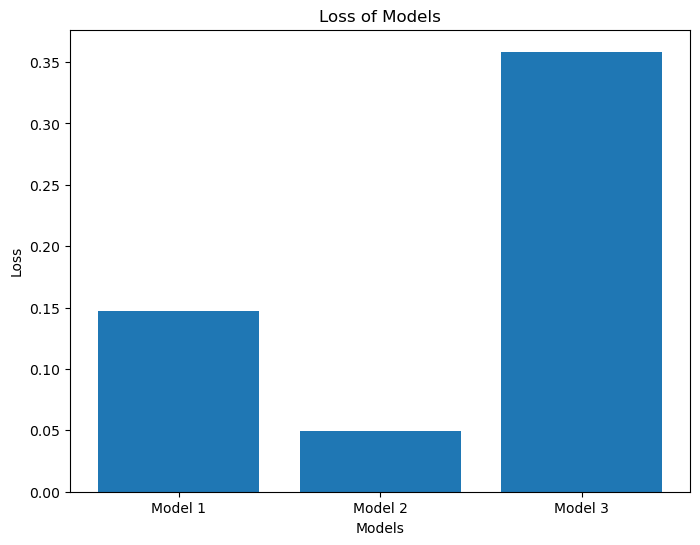

In [25]:
# Lists to store accuracy and loss values for each model
accuracy_values = []
loss_values = []

# Evaluate each model on the validation or test set
models = [model1, model2, model3]  # Replace with your models
for model in models:
    # Evaluate the model on the validation or test set
    evaluation = model.evaluate(valid_generator)  # Replace with your validation or test set
    accuracy_values.append(evaluation[1])  # Assuming accuracy is at index 1
    loss_values.append(evaluation[0])  # Assuming loss is at index 0

# Plotting accuracy for all models
plt.figure(figsize=(8, 6))
plt.bar(np.arange(len(models)), accuracy_values, tick_label=['Model 1', 'Model 2', 'Model 3'])
plt.title('Accuracy of Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limit to represent accuracy values (0 to 1)
plt.show()

# Plotting loss for all models
plt.figure(figsize=(8, 6))
plt.bar(np.arange(len(models)), loss_values, tick_label=['Model 1', 'Model 2', 'Model 3'])
plt.title('Loss of Models')
plt.xlabel('Models')
plt.ylabel('Loss')
plt.show()

3/3 [==============================] - 3s 722ms/step


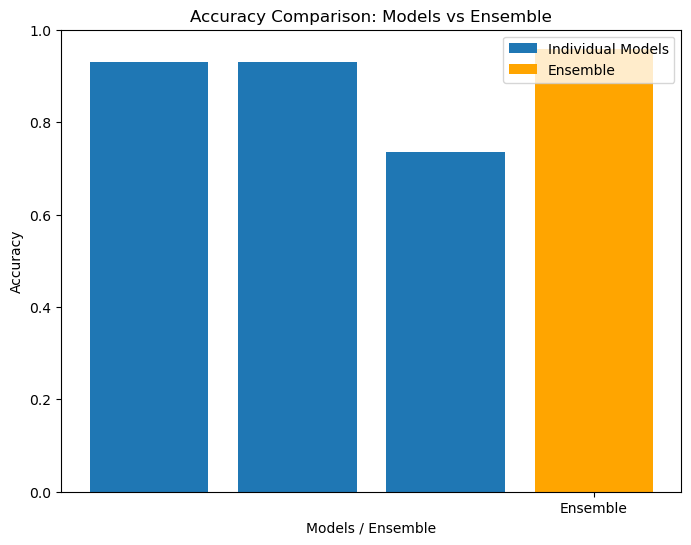

In [27]:
# Generate predictions from refined models
preds_model1 = model1.predict(test_generator)
preds_model2 = model2.predict(test_generator)
preds_model3 = model3.predict(test_generator)

# Calculate accuracies for individual models
accuracy_model1 = accuracy_score(test_generator.classes, np.argmax(preds_model1, axis=1))
accuracy_model2 = accuracy_score(test_generator.classes, np.argmax(preds_model2, axis=1))
accuracy_model3 = accuracy_score(test_generator.classes, np.argmax(preds_model3, axis=1))

# Plotting accuracies
plt.figure(figsize=(8, 6))

# Plot individual model accuracies
plt.bar([1, 2, 3], [accuracy_model1, accuracy_model2, accuracy_model3], tick_label=['Model 1', 'Model 2', 'Model 3'], label='Individual Models')
# Plot ensemble accuracy
plt.bar(4, ensemble_result, tick_label=['Ensemble'], label='Ensemble', color='orange')

plt.title('Accuracy Comparison: Models vs Ensemble')
plt.xlabel('Models / Ensemble')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limit to represent accuracy values (0 to 1)
plt.legend()
plt.show()

In [19]:
# Generate predictions from refined models
preds_model1 = model1.predict(test_generator)
preds_model2 = model2.predict(test_generator)
preds_model3 = model3.predict(test_generator)

# Ensemble method: weighted averaging predictions
# Adjust weights according to the model performance on validation data
ensemble_preds = (0.4 * preds_model1 + 0.3 * preds_model2 + 0.3 * preds_model3) / 3

# Evaluate ensemble performance
ensemble_result = model1.evaluate(test_generator)  # Evaluate on any one model
print("Ensemble Test loss, Test accuracy:", ensemble_result)


3/3 [==============================] - 0s 116ms/step - loss: 0.2709 - accuracy: 0.9306
Ensemble Test loss, Test accuracy: [0.2709101438522339, 0.9305555820465088]


In [22]:
from sklearn.metrics import accuracy_score  # Import accuracy_score function

# Generate predictions from refined models
preds_model1 = model1.predict(test_generator)
preds_model2 = model2.predict(test_generator)
preds_model3 = model3.predict(test_generator)

# Ensemble method: weighted averaging predictions
# Adjust weights according to the model performance on validation data
ensemble_preds = (0.4 * preds_model1 + 0.3 * preds_model2 + 0.3 * preds_model3) / 3

# Evaluate ensemble performance
ensemble_result = accuracy_score(test_generator.classes, np.argmax(ensemble_preds, axis=1))
print("Ensemble Accuracy on Test Set:", ensemble_result)


3/3 [==============================] - 3s 711ms/step
Ensemble Accuracy on Test Set: 0.9583333333333334


In [28]:
#Use of Ensemble:
def ensemble_predict(model1, model2, model3, data_generator):
    # Generate predictions from each individual model
    preds_model1 = model1.predict(data_generator)
    preds_model2 = model2.predict(data_generator)
    preds_model3 = model3.predict(data_generator)
    
    # Ensemble method: weighted averaging predictions
    ensemble_preds = (0.2 * preds_model1 + 0.4 * preds_model2 + 0.4 * preds_model3) / 3
    
    # Return the final ensemble prediction
    return ensemble_preds

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to the folder containing the new data on your desktop
new_data_folder = r"C:\Users\arghy\Desktop\new_data_folder"

In [31]:
# Create an ImageDataGenerator for the new data
new_data_generator = ImageDataGenerator(rescale=1./255)  # You can add more augmentation parameters if needed

# Generate the data generator for the new data
new_generator = new_data_generator.flow_from_directory(
    new_data_folder,
    target_size=(200, 200),  # Adjust target size according to your model's input size
    batch_size=32,
    class_mode=None,  # Set to None for inference/prediction
    shuffle=False  # Set to False if you want to predict in order
)

Found 12 images belonging to 1 classes.


In [33]:
# Assuming you have a new data generator named new_data_generator
new_data_predictions = ensemble_predict(model1, model2, model3, new_generator)

1/1 [==============================] - 1s 1s/step


In [34]:
print(new_data_predictions.shape)  # Check the shape of predictions
print(new_data_predictions)  # Display the predictions (might be too large to print all)

(12, 6)
[[3.2545173e-01 4.4008775e-04 3.9799600e-03 2.3773743e-03 1.5914244e-04
  9.2506892e-04]
 [2.9953521e-01 2.8307920e-03 1.6054308e-02 7.5785206e-03 2.0234962e-03
  5.3110048e-03]
 [5.7751054e-06 3.2186681e-01 1.8089657e-05 8.3002588e-03 7.0121030e-05
  3.0722932e-03]
 [1.5043231e-05 3.1759992e-01 4.2622680e-05 1.2263554e-02 1.7019564e-04
  3.2419853e-03]
 [1.2136590e-07 9.4086500e-03 2.7263065e-06 3.2383251e-01 4.2621441e-06
  8.5046740e-05]
 [1.7112441e-08 4.3979795e-03 4.5272270e-07 3.2893321e-01 8.9960304e-07
  7.9182684e-07]
 [3.8956907e-02 2.2104946e-04 2.9140410e-01 1.6284065e-03 7.9371493e-05
  1.0435028e-03]
 [5.4722521e-03 1.0816617e-03 3.1514958e-01 1.5743397e-03 9.9665974e-04
  9.0588359e-03]
 [7.3045626e-02 5.7321657e-05 1.4610250e-03 6.4620539e-03 2.5203601e-01
  2.7131880e-04]
 [6.4357154e-02 1.5229110e-04 1.6186968e-03 3.6721600e-03 2.6312843e-01
  4.0461440e-04]
 [1.3109915e-10 2.3692948e-09 6.2129628e-05 6.7420650e-08 2.0307083e-09
  3.3327115e-01]
 [3.3221022e-

In [35]:
predicted_labels = np.argmax(new_data_predictions, axis=1)
print(predicted_labels)

[0 0 1 1 3 3 2 2 4 4 5 5]


ValueError: num must be an integer with 1 <= num <= 6, not 7

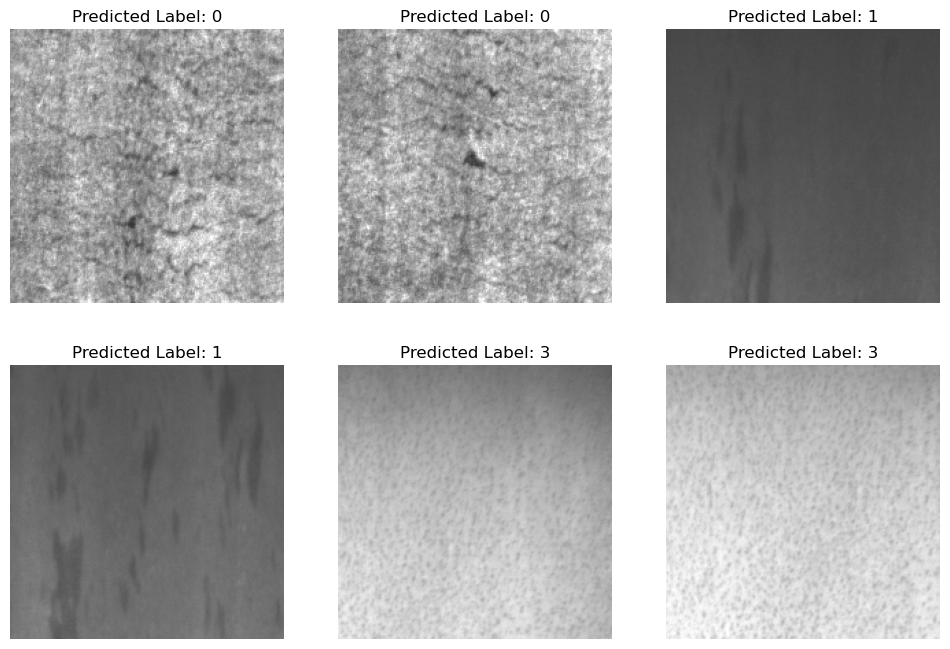

In [44]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img

# Path to the folder containing the images
folder_path = r"C:\Users\arghy\Desktop\new_data_folder\valid"

# List of image filenames in the folder
image_files = sorted(os.listdir(folder_path))

# Load and display images along with predicted labels
num_images = len(image_files)

plt.figure(figsize=(12, 8))
for i in range(num_images):
    plt.subplot(2, 3, i + 1)  # Adjust subplot based on the number of images (2 rows, 3 columns in this case)
    
    # Load the image
    img = load_img(os.path.join(folder_path, image_files[i]), target_size=(200, 200))  # Adjust target_size if needed
    plt.imshow(img)
    
    # Show the predicted label on the plot
    plt.title(f"Predicted Label: {predicted_labels[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()
